# Housing Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.


In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the dataset and assigning dependent and independent variables, here X is independent variable and y is dependent variable
dataset = pd.read_csv('Housing.csv')
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [4]:
#Encoding the Independent Variable , all catogorical data wll be converted into binary numbers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,4] = labelencoder_X.fit_transform(X[:,4])
X[:,5] = labelencoder_X.fit_transform(X[:,5])
X[:,6] = labelencoder_X.fit_transform(X[:,6])
X[:,7] = labelencoder_X.fit_transform(X[:,7])
X[:,8] = labelencoder_X.fit_transform(X[:,8])
X[:, 10] = labelencoder_X.fit_transform(X[:, 10])
X[:, 11] = labelencoder_X.fit_transform(X[:, 11])
onehotencoder = OneHotEncoder(categorical_features = [11])
X = onehotencoder.fit_transform(X).toarray()

# ?-Need to check that if we can fit above statements in one line

C:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [5]:
#Avoiding Dummy variable trap
X=X[:,1:]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Fitting Multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#Predicting the test set results
y_pred=regressor.predict(X_test)

Text(0.5, 0.98, 'Actual Vs Predicted ')

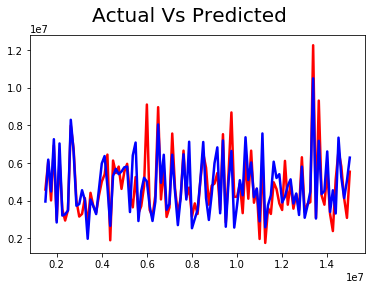

In [7]:
#Graph for Predicted Vs Actual
x_axis = np.linspace(1500000,15000000,109)
fig = plt.figure()
plt.plot(x_axis,y_test, color="red",  linewidth=2.5, linestyle="-")
plt.plot(x_axis,y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Actual Vs Predicted ', fontsize=20)
# ?-Need to check better way to define X axis or how to keep both axis on same level


In [8]:
'''
Following command will add array of one's as a single row to X array in the end

X=np.append(arr=X,values=np.ones((545,1)).astype(int),axis = 1)

To add the the one's in the begining just reverse the order in previous command
so that X as array added to one's array
'''
X=np.append(arr=np.ones((545,1)).astype(int),axis = 1,values=X)


In [9]:
#Building the optimal model using Backward Elimination 
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((545,1)).astype(int),axis = 1,values=X)

X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13]]


In [10]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     87.14
Date:                Fri, 26 Jul 2019   Prob (F-statistic):          3.99e-117
Time:                        20:39:27   Log-Likelihood:                -8347.3
No. Observations:                 545   AIC:                         1.672e+04
Df Residuals:                     532   BIC:                         1.678e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.203e+04   1.36e+05     -0.236      0.813   -2.98e+05    2.34e+05
x1         -3.203e+04   1.36e+05     -0.236      0.813   -2.98e+05    2.34e+05
x2          -6.86e+04    1.2e+05     -0.573      0.567   -3.04e+05    1.67e+05
x3         -4.317e+05    1.3e+05     -3.327      0.001   -6.87e+05   -1.77e+05
x4           266.2251     24.653     10.799      0.000     217.797     314.653
x5          1.234e+05   7.46e+04      1.653      0.099   -2.33e+04     2.7e+05
x6          9.739e+05   1.06e+05      9.164      0.000    7.65e+05    1.18e+06
x7          4.622e+05    6.6e+04      7.007      0.000    3.33e+05    5.92e+05
x8          5.234e+05   1.45e+05      3.608      0.000    2.38e+05    8.08e+05
x9          3.306e+05   1.35e+05      2.442      0.015    6.47e+04    5.96e+05
x10         4.674e+05   1.11e+05      4.196      0.000    2.49e+05    6.86e+05
x11         7.876e+05   2.29e+05      3.437      0.001    3.37e+05    1.24e+06
x12         8.831e+05   1.11e+05      7.928      0.000    6.64e+05     1.1e+06
x13         2.727e+05   6.02e+04      4.531      0.000    1.54e+05    3.91e+05
==============================================================================
Omnibus:                       91.096   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.018
Skew:                           0.820   Prob(JB):                     3.11e-55
Kurtosis:                       5.892   Cond. No.                     2.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.45e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
X_opt = X[:, [0, 2, 3, 4, 5,6,7,8,9,10,11,12,13]]

In [12]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     87.14
Date:                Fri, 26 Jul 2019   Prob (F-statistic):          3.99e-117
Time:                        20:39:30   Log-Likelihood:                -8347.3
No. Observations:                 545   AIC:                         1.672e+04
Df Residuals:                     532   BIC:                         1.678e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.407e+04   2.71e+05     -0.236      0.813   -5.97e+05    4.69e+05
x1          -6.86e+04    1.2e+05     -0.573      0.567   -3.04e+05    1.67e+05
x2         -4.317e+05    1.3e+05     -3.327      0.001   -6.87e+05   -1.77e+05
x3           266.2251     24.653     10.799      0.000     217.797     314.653
x4          1.234e+05   7.46e+04      1.653      0.099   -2.33e+04     2.7e+05
x5          9.739e+05   1.06e+05      9.164      0.000    7.65e+05    1.18e+06
x6          4.622e+05    6.6e+04      7.007      0.000    3.33e+05    5.92e+05
x7          5.234e+05   1.45e+05      3.608      0.000    2.38e+05    8.08e+05
x8          3.306e+05   1.35e+05      2.442      0.015    6.47e+04    5.96e+05
x9          4.674e+05   1.11e+05      4.196      0.000    2.49e+05    6.86e+05
x10         7.876e+05   2.29e+05      3.437      0.001    3.37e+05    1.24e+06
x11         8.831e+05   1.11e+05      7.928      0.000    6.64e+05     1.1e+06
x12         2.727e+05   6.02e+04      4.531      0.000    1.54e+05    3.91e+05
==============================================================================
Omnibus:                       91.096   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.018
Skew:                           0.820   Prob(JB):                     3.11e-55
Kurtosis:                       5.892   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X_opt = X[:, [0, 2, 3, 5,6,7,8,9,10,11,12,13]]

In [14]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     69.40
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           2.05e-95
Time:                        20:39:32   Log-Likelihood:                -8401.3
No. Observations:                 545   AIC:                         1.683e+04
Df Residuals:                     533   BIC:                         1.688e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.296e+05   2.91e+05      2.167      0.031    5.87e+04     1.2e+06
x1         -1.187e+05   1.32e+05     -0.899      0.369   -3.78e+05    1.41e+05
x2         -5.122e+05   1.43e+05     -3.585      0.000   -7.93e+05   -2.32e+05
x3          1.907e+05   8.21e+04      2.324      0.021    2.95e+04    3.52e+05
x4          1.084e+06   1.17e+05      9.288      0.000    8.55e+05    1.31e+06
x5          4.115e+05   7.26e+04      5.669      0.000    2.69e+05    5.54e+05
x6          8.798e+05   1.56e+05      5.645      0.000    5.74e+05    1.19e+06
x7          4.666e+05   1.49e+05      3.138      0.002    1.75e+05    7.59e+05
x8           4.05e+05   1.23e+05      3.301      0.001    1.64e+05    6.46e+05
x9          7.432e+05   2.53e+05      2.940      0.003    2.47e+05    1.24e+06
x10         1.044e+06   1.22e+05      8.572      0.000    8.05e+05    1.28e+06
x11         4.432e+05   6.41e+04      6.917      0.000    3.17e+05    5.69e+05
==============================================================================
Omnibus:                       92.461   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.405
Skew:                           0.837   Prob(JB):                     2.56e-55
Kurtosis:                       5.876   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X_opt = X[:, [0,2, 3,5,6,7,9,10,11,12,13]]

In [16]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     69.16
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.04e-89
Time:                        20:39:33   Log-Likelihood:                -8417.2
No. Observations:                 545   AIC:                         1.686e+04
Df Residuals:                     534   BIC:                         1.690e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.431e+06   2.61e+05      5.486      0.000    9.19e+05    1.94e+06
x1         -1.615e+05   1.36e+05     -1.191      0.234   -4.28e+05    1.05e+05
x2          -6.01e+05   1.46e+05     -4.114      0.000   -8.88e+05   -3.14e+05
x3          1.421e+05   8.39e+04      1.693      0.091   -2.28e+04    3.07e+05
x4          1.066e+06    1.2e+05      8.883      0.000     8.3e+05     1.3e+06
x5          4.668e+05    7.4e+04      6.311      0.000    3.21e+05    6.12e+05
x6          5.148e+05   1.53e+05      3.373      0.001    2.15e+05    8.15e+05
x7          4.303e+05   1.26e+05      3.412      0.001    1.83e+05    6.78e+05
x8          7.132e+05    2.6e+05      2.744      0.006    2.03e+05    1.22e+06
x9           1.06e+06   1.25e+05      8.462      0.000    8.14e+05    1.31e+06
x10         5.117e+05   6.47e+04      7.909      0.000    3.85e+05    6.39e+05
==============================================================================
Omnibus:                       86.781   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.263
Skew:                           0.816   Prob(JB):                     1.09e-47
Kurtosis:                       5.619   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_opt = X[:, [2,3,5,6,7,9,10,11,12,13]]

In [18]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     819.0
Date:                Fri, 26 Jul 2019   Prob (F-statistic):          8.15e-317
Time:                        20:39:35   Log-Likelihood:                -8432.1
No. Observations:                 545   AIC:                         1.688e+04
Df Residuals:                     535   BIC:                         1.693e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.113e+05    1.3e+05      0.859      0.391   -1.43e+05    3.66e+05
x2         -2.429e+05   1.34e+05     -1.810      0.071   -5.06e+05    2.07e+04
x3          4.218e+05   6.85e+04      6.161      0.000    2.87e+05    5.56e+05
x4          1.216e+06    1.2e+05     10.133      0.000     9.8e+05    1.45e+06
x5          5.072e+05   7.56e+04      6.711      0.000    3.59e+05    6.56e+05
x6          5.223e+05   1.57e+05      3.332      0.001    2.14e+05     8.3e+05
x7          4.995e+05   1.29e+05      3.877      0.000    2.46e+05    7.53e+05
x8           7.01e+05   2.67e+05      2.627      0.009    1.77e+05    1.23e+06
x9          1.059e+06   1.29e+05      8.239      0.000    8.07e+05    1.31e+06
x10         5.411e+05   6.62e+04      8.172      0.000    4.11e+05    6.71e+05
==============================================================================
Omnibus:                       46.185   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.619
Skew:                           0.488   Prob(JB):                     3.85e-22
Kurtosis:                       4.842   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
'''
Creating new train set with only X_opt  as this is the optimized data set
with this will calculate new predicted value 
With both predicted values and actual value will create a graph to compare them
'''
X_train_new, X_test_new, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)
regressor_new=LinearRegression()
regressor_new.fit(X_train_new,y_train)
y_pred_new=regressor_new.predict(X_test_new)


Text(0.5, 0.98, 'Actual Vs _New Predicted ')

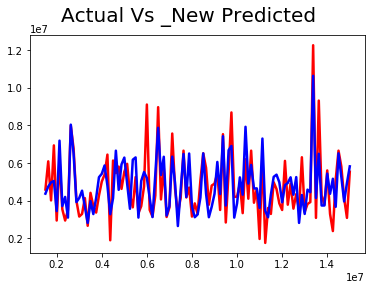

In [20]:
#Graph for New Predicted Vs Actual
fig = plt.figure()
plt.plot(x_axis,y_test, color="red",  linewidth=2.5, linestyle="-")
plt.plot(x_axis,y_pred_new, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Actual Vs _New Predicted ', fontsize=20)

Text(0.5, 0.98, 'Actual Vs Predicted Vs New Predicted ')

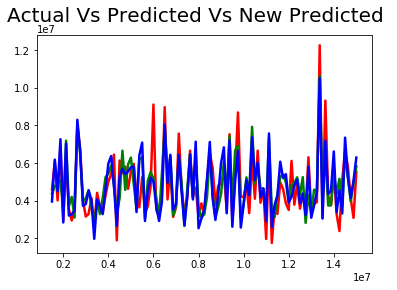

In [21]:
#Graph for Predicted Vs New Predicted Vs Actual
fig = plt.figure()
plt.plot(x_axis,y_test, color="red",  linewidth=2.5, linestyle="-")
plt.plot(x_axis,y_pred_new, color="green", linewidth=2.5, linestyle="-")
plt.plot(x_axis,y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Actual Vs Predicted Vs New Predicted ', fontsize=20)